In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

Wir nutzen den MNIST-Datensatz (https://en.wikipedia.org/wiki/MNIST_database). Das Laden kann eventuell mehrere Minuten dauern.

Der Datensatz besteht aus 70.000 Bildern, welche die handschriftlichen Ziffern 0 bis 9 darstellen.
Jede Ziffer liegt als Graustufenbild mit 28x28 Pixeln vor, welche jeweils Grauwerte zwischen 0 und 255 haben.
D.h. pro Ziffer sind es $28*28=784$ Werte.

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
y.value_counts(sort=False)

0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: class, dtype: int64

In [5]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Im Folgenden reichen uns die zugrundeliegenden Numpy-Werte.

In [6]:
X = X.values
y = y.astype(int).values

Bisher Zahlenwerte zwischen 0 und 255. Diese skalieren wir auf das Intervall [0; 1].

In [7]:
X = X / 255.0

Jeweils ein Beispiel für jede Ziffer plotten:

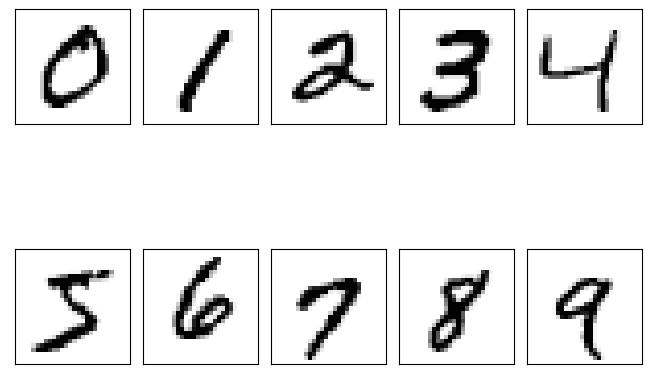

In [8]:
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, layout = "constrained")
axs = axs.flatten()
for i in range(10):
    img = X[y==i][0].reshape(28, 28)
    axs[i].imshow(img, cmap="Greys")
axs[0].set(xticks=[], yticks = [])
plt.show()

Mehrere Beispiele für die Ziffer 4 anzeigen:

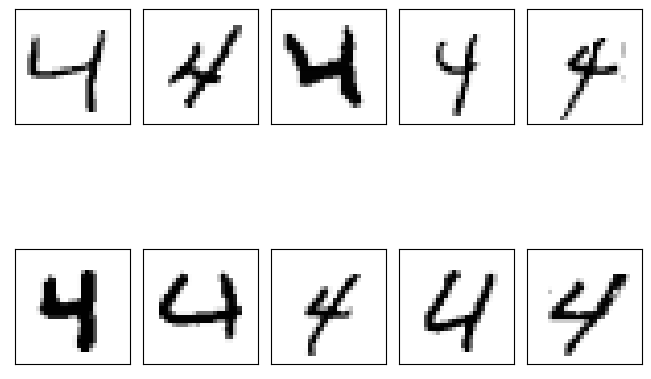

In [9]:
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, layout = "constrained")
axs = axs.flatten()
for i in range(10):
    img = X[y==4][i].reshape(28, 28)
    axs[i].imshow(img, cmap="Greys")
axs[0].set(xticks=[], yticks = [])
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=42, stratify=y)

In [11]:
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 50),
    alpha = 0.01,
    verbose=True,
    random_state=1
)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.51793557
Iteration 2, loss = 0.20786180
Iteration 3, loss = 0.16303496
Iteration 4, loss = 0.13756482
Iteration 5, loss = 0.11822362
Iteration 6, loss = 0.10311228
Iteration 7, loss = 0.09273340
Iteration 8, loss = 0.08449239
Iteration 9, loss = 0.07571469
Iteration 10, loss = 0.07036711
Iteration 11, loss = 0.06422631
Iteration 12, loss = 0.05972094
Iteration 13, loss = 0.05661134
Iteration 14, loss = 0.05193761
Iteration 15, loss = 0.04987287
Iteration 16, loss = 0.04683819
Iteration 17, loss = 0.04339014
Iteration 18, loss = 0.04227621
Iteration 19, loss = 0.03997632
Iteration 20, loss = 0.03682426
Iteration 21, loss = 0.03573898
Iteration 22, loss = 0.03373210
Iteration 23, loss = 0.03304830
Iteration 24, loss = 0.03073039
Iteration 25, loss = 0.02996747
Iteration 26, loss = 0.03052367
Iteration 27, loss = 0.02831753
Iteration 28, loss = 0.02694128
Iteration 29, loss = 0.02677645
Iteration 30, loss = 0.02745823
Iteration 31, loss = 0.02513371
Iteration 32, los

MLPClassifier(alpha=0.01, hidden_layer_sizes=(50, 50), random_state=1,
              verbose=True)

In [12]:
# (50, 50)
print("Training set score: ", mlp.score(X_train, y_train))
print("Test set score: ", mlp.score(X_test, y_test))

Training set score:  0.9991964285714285
Test set score:  0.9747142857142858


Trainiertes Modell nutzen:

In [13]:
mlp.predict(X_test[0:2])

array([7, 3])

In [14]:
mlp.predict_proba(X_test[0:2])

array([[6.90918769e-12, 3.49558303e-15, 1.71001353e-11, 7.65317398e-09,
        5.50946080e-17, 2.25729063e-16, 1.62585367e-21, 9.99999992e-01,
        3.03637394e-14, 9.10412694e-11],
       [7.57088432e-13, 6.36847707e-13, 3.91420715e-17, 9.99678809e-01,
        5.55601476e-16, 3.06647684e-04, 2.61158575e-16, 4.55887265e-13,
        2.00898796e-07, 1.43423676e-05]])

In [15]:
y_test_pred = mlp.predict(X_test)

X_wrong = X_test[y_test_pred != y_test]
y_wrong = y_test[y_test_pred != y_test]
y_wrong_pred = y_test_pred[y_test_pred != y_test]

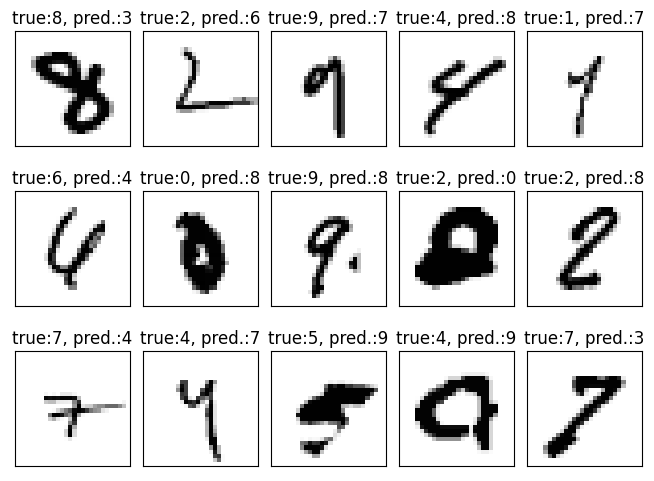

In [16]:
fig, axs = plt.subplots(3, 5, sharex=True, sharey=True, layout = "constrained")
axs = axs.flatten()
for i in range(15):
    img = X_wrong[i].reshape(28, 28)
    axs[i].imshow(img, cmap="Greys")
    axs[i].set_title("true:{}, pred.:{}".format(y_wrong[i], y_wrong_pred[i]))
axs[0].set(xticks=[], yticks = [])
plt.show()